## Titanic Dataset

This analysis is looking at the Titanic dataset. The main question we look to solve is which categories of passengers were most likely to survive. Data comes from: https://www.kaggle.com/c/titanic/data, file train.csv. This was 

## Analysis

In [2]:
# Package Imports
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Import the data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Going into the analysis these are the variables that are related to survival: Pclass, Sex, Age, SibSp, Parch. The variables that are not related to the survival include: Ticket, Fare, Cabin, Name, PassengerId and Embarked. The rationale for this will be explained later on.

**My hypothesis is as follows:**
* Those in a higher socioeconomic status will have a greater chances of survival.
* Females will have a greater chance of survival than males.
* The young will have a higher chance of survival than the old.
* Those with families will have a higher chance of survival than those without families.


**Notes from Kaggle about Dataset:**
* Survival, 0 = No, 1 = Yes
* Pclass, 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp, Parch, is value is the number of siblings/spouses or number of parents/children on board


Let's clean this dataset to only include the relevant variables.

In [4]:
# Look at the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that our dataset has 891 observations or people that we will be looking at, and 12 variables. PassengerId would be a unique identifying number for each observation, so we set that to be the index. We have 5 variables that are objects: Name, Sex, Ticket, Cabin, and Embarked. Out of these 5 we are most interested in the Sex variable, as it is directly relevant to our hypothesis. Since it is an object, we want to be sure that it is only giving us a category for 'male' and 'female'. To check this, we use the `.unique()` method. When passing this, we can verify that the column only has 'male' or 'female' as values.

In [5]:
# Set PassengerId as Index
df.set_index('PassengerId', inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# check that Sex only has female and male as values
df['Sex'].unique()

array(['male', 'female'], dtype=object)

Out of the 11 variables remaining, we have 3 with missing data: Age, Cabin, and Embarked. Out of the three, Age is the most important to us, so our goal is to maximize the data in this variable. To clean the data we will start by looking at Cabin and Embarked. The process here was to see what the unique values were and then to deal with the null observations. For both, the idea is to replace the null values, so that when we drop the null objects in Age, we do not lose data. If we used `.dropna()` straight on the data set, we would only be left with 204 or less observations due to the Cabin column. To replace the values, the `.fillna()` method can be used to replace the nan with a filler value and setting passing True for the inplace parameter. This will replace the null values within those columns. 



In [7]:
# Look at Cabin's observations
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
# Replace the null values in Cabin
df['Cabin'].fillna('0', inplace = True)
df['Cabin'].unique()

array(['0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We no longer have any null objects in the Cabin variable.

In [9]:
# Let's do the same to Embarked.
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# Replace the nan in Embarked
df['Embarked'].fillna('0', inplace = True)
df['Embarked'].unique()

array(['S', 'C', 'Q', '0'], dtype=object)

We no longer have any null objects in Embarked.

The next step is to remove the null values from the Age column. The reason to remove the null values is because we do not have the data to accurately approximate the Age observations for those who are missing it. If we had a piece of information like the passengers birthdate or birth year, we would be able to come up with an estimate for Age. However, we do not have information that helps estimate without performing unreliable speculation.

In [11]:
# Drop nan from the entire dataset, this should leave you with all the observations that has an Age observation
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 11 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Name        714 non-null object
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Ticket      714 non-null object
Fare        714 non-null float64
Cabin       714 non-null object
Embarked    714 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.9+ KB


Now that we have dropped the null values using `.dropna()`, we are left with 714 observations. Here, we still have variables that we do not consider relevant to our analysis. The next step is to reduce the data set to exclude: Ticket, Fare, Cabin, and Embarked.



In [12]:
# removing the columns we have deemed not necessary
df = df.loc[:,:'Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
PassengerId,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


In [13]:
# Let's take a look at the descriptive stats

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373
std,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [15]:
# Take a look at the data via a pairplot

/Users/rahimjiwa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


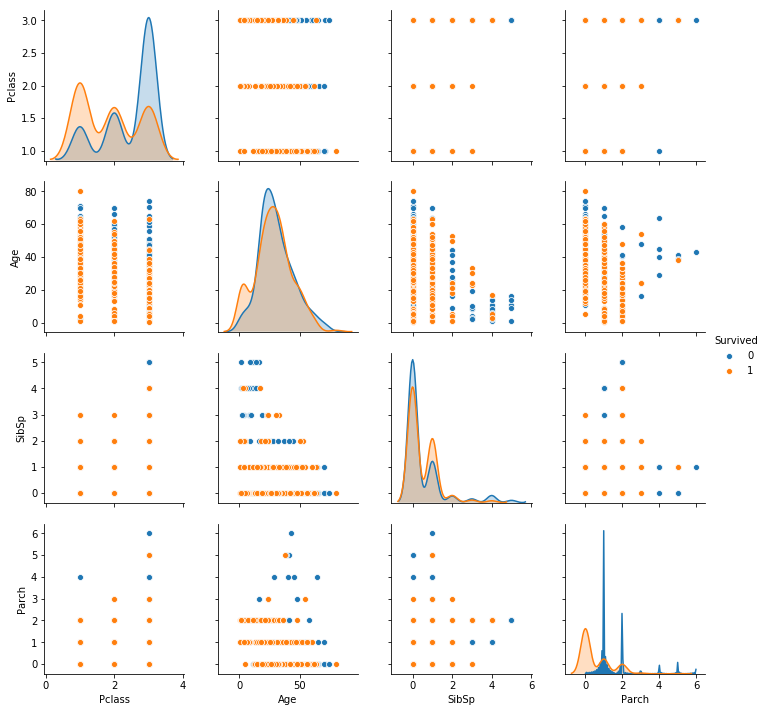

In [16]:
sns.pairplot(df, hue='Survived', vars=['Pclass','Age','SibSp','Parch'])

Now, to deal with the Age variable. What we want is to have the Age in brackets. To do this, we create a new variable called Age_Bracket which is going to be populated by binning the Age data into 10 year intervals.

Based off of the earlier stats, we can see that the min age is 0.42 and the max age is 80.



In [17]:
# Create Age_Bracket
df['Age_Bracket'] = pd.cut(df['Age'], np.linspace(0,80,9), right=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Age_Bracket
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,"(20.0, 30.0]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,"(30.0, 40.0]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,"(20.0, 30.0]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,"(30.0, 40.0]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,"(30.0, 40.0]"


To make the analysis of SibSp and Parch easier, we are going to create a variable to combine this into one variable to represent the number of family members the passenger has. 

In [18]:
# Create NumFamilyMembers
df['NumFamilyMembers'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Age_Bracket,NumFamilyMembers
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,"(20.0, 30.0]",1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,"(30.0, 40.0]",1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,"(20.0, 30.0]",0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,"(30.0, 40.0]",1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,"(30.0, 40.0]",0


Now we once again have a few variables that we will not be using. Let us create a dataset just for the relevant variables.

In [19]:
df_relevant = df[['Survived','Pclass','Sex','Age_Bracket','NumFamilyMembers']]
df_relevant.head()

,Survived,Pclass,Sex,Age_Bracket,NumFamilyMembers
PassengerId,,,,,
1,0,3,male,"(20.0, 30.0]",1
2,1,1,female,"(30.0, 40.0]",1
3,1,3,female,"(20.0, 30.0]",0
4,1,1,female,"(30.0, 40.0]",1
5,0,3,male,"(30.0, 40.0]",0


Our dataset is now clean and we can begin querying it. To do this, we are going to look at the categories and compare them to: the entire ship (whose data we are using) population, the survivor population, and the category populations.

We will also do a query to find the subset with the greatest number of instances of survival.

In [20]:
# Sex Survival Within Entire Population
df_relevant.groupby('Sex')['Survived'].sum() / df_relevant['Survived'].count()

Sex
female    0.275910
male      0.130252
Name: Survived, dtype: float64

In [21]:
# Sex Survival Within Surviving Population
df_relevant.groupby('Sex')['Survived'].sum() / df_relevant['Survived'].sum()

Sex
female    0.67931
male      0.32069
Name: Survived, dtype: float64

In [22]:
# Sex Survival Within Sex Population
df_relevant.groupby('Sex')['Survived'].sum() / df_relevant.groupby('Sex')['Survived'].count()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [23]:
# Survival Rate by Class Within Entire Population
df_relevant.groupby('Pclass')['Survived'].sum() / df_relevant['Survived'].count()

Pclass
1    0.170868
2    0.116246
3    0.119048
Name: Survived, dtype: float64

In [24]:
# Survival Rate by Class Within Surviving Population
df_relevant.groupby('Pclass')['Survived'].sum() / df_relevant['Survived'].sum()

Pclass
1    0.420690
2    0.286207
3    0.293103
Name: Survived, dtype: float64

In [25]:
# Survival Rate by Class Within Class Population
df_relevant.groupby('Pclass')['Survived'].sum() / df_relevant.groupby('Pclass')['Survived'].count()

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [26]:
# Survival Rate by Age Bracket Within Entire Population
df_relevant.groupby('Age_Bracket')['Survived'].sum() / df_relevant['Survived'].count()

Age_Bracket
(0.0, 10.0]     0.053221
(10.0, 20.0]    0.061625
(20.0, 30.0]    0.117647
(30.0, 40.0]    0.096639
(40.0, 50.0]    0.046218
(50.0, 60.0]    0.023810
(60.0, 70.0]    0.005602
(70.0, 80.0]    0.001401
Name: Survived, dtype: float64

In [27]:
# Survival Rate by Age Bracket within Surviving Population
df_relevant.groupby('Age_Bracket')['Survived'].sum() / df_relevant['Survived'].sum()

Age_Bracket
(0.0, 10.0]     0.131034
(10.0, 20.0]    0.151724
(20.0, 30.0]    0.289655
(30.0, 40.0]    0.237931
(40.0, 50.0]    0.113793
(50.0, 60.0]    0.058621
(60.0, 70.0]    0.013793
(70.0, 80.0]    0.003448
Name: Survived, dtype: float64

In [28]:
# Survival Rate by Age Bracket within Age Bracket Population
df_relevant.groupby('Age_Bracket')['Survived'].sum() / df_relevant.groupby('Age_Bracket')['Survived'].count()

Age_Bracket
(0.0, 10.0]     0.593750
(10.0, 20.0]    0.382609
(20.0, 30.0]    0.365217
(30.0, 40.0]    0.445161
(40.0, 50.0]    0.383721
(50.0, 60.0]    0.404762
(60.0, 70.0]    0.235294
(70.0, 80.0]    0.200000
Name: Survived, dtype: float64

In [29]:
# Number Of Family Members Survival Rate within Entire Population
df_relevant.groupby('NumFamilyMembers')['Survived'].sum() / df_relevant['Survived'].count()

NumFamilyMembers
0    0.182073
1    0.106443
2    0.074230
3    0.029412
4    0.004202
5    0.004202
6    0.005602
7    0.000000
Name: Survived, dtype: float64

In [30]:
# Survival Rate by Number of Family Members within Surviving Population
df_relevant.groupby('NumFamilyMembers')['Survived'].sum() / df_relevant['Survived'].sum() 

NumFamilyMembers
0    0.448276
1    0.262069
2    0.182759
3    0.072414
4    0.010345
5    0.010345
6    0.013793
7    0.000000
Name: Survived, dtype: float64

In [31]:
# Survival Rate by Number of Family Members within Number of Family Members group population
df_relevant.groupby('NumFamilyMembers')['Survived'].sum() / df_relevant.groupby('NumFamilyMembers')['Survived'].count()

NumFamilyMembers
0    0.321782
1    0.546763
2    0.569892
3    0.777778
4    0.272727
5    0.136364
6    0.333333
7    0.000000
Name: Survived, dtype: float64

In [32]:
# To find subset of categories that had the highest instance of survival
df_relevant.groupby(['NumFamilyMembers','Sex','Pclass','Age_Bracket']).sum().idxmax()

Survived    (0, female, 1, (20.0, 30.0])
dtype: object

## Data From Analysis

<p style='text-align:center;'><b>Pclass</b></p>

|Pclass|Survival of Class Within Entire Population|Survival Rate Within Surviving Population|Survival Rate Within Class Population|
|---|---|---|---|
|1st Class| 0.170868|0.42.0690|0.655914|
|2nd Class| 0.116246|0.286207|0.479769|
|3rd Class| 0.119048|0.293103|0.239437|


<p style='text-align:center;'><b>Sex</b></p>



|Sex|Survival Rate Within Entire Population|Survival Rate Within Surviving Population|Survival Rate Within Sex Population|
|---|---|---|---|
|Female|0.275910|0.67931|0.754789|
|Male|0.130252|0.32069|0.205298|


<p style='text-align:center;'><b>Age Bracket</b></p>



|Age Bracket| Survival Rate Within Entire Population|Survival Rate Within Surviving Population|Survival Rate Within Age Bracket Population|
|---|---|---|---|
|(0,10]|0.053221|0.131034|0.593750|
|(10,20]|0.061625|0.151724|0.382609|
|(20,30]|0.117647|0.289655|0.365217|
|(30,40]|0.096639|0.237931|0.445161|
|(40,50]|0.046218|0.113793|0.383721|
|(50,60]|0.023810|0.058621|0.404762|
|(60,70]|0.005602|0.013793|0.235294|
|(70,80]|0.001401|0.003448|0.200000|


<p style='text-align:center;'><b>Number of Family Members</b></p>



|Number of Family Members| Survival Rate Within Population|Survival Rate Within Surviving Population|Survival Rate within Number of Family Members Population|
|---|---|---|---|
|0|0.182073|0.448276|0.321782|
|1|0.106443|0.262069|0.546763|
|2|0.074230|0.182759|0.569892|
|3|0.029412|0.072414|0.777778|
|4|0.004202|0.010345|0.272727|
|5|0.004202|0.010345|0.136364|
|6|0.005602|0.013793|0.333333|
|7|0.000000|0.000000|0.000000|



## Written Answers

**What categories of passengers were most likely to survive?**

To answer this question, we looked at the survival rate amongst the entire population on the ship, the percentage that the category makes up of the survivors, and the survival rate amongst the entire population within that category. 

Let us refer back to the hypothesis before we started the analysis. 

**My hypothesis was:**
* Those in a higher socioeconomic status will have a greater chances of survival.
* Females will have a greater chance of survival than males.
* The young will have a higher chance of survival than the old.
* Those with families will have a higher chance of survival than those without families.

Now looking at the results from our analysis. We found that the categories that had the highest instance of survival were:

|Categories|Within Entire Population|Within Surviving Population|Within Category Population
|---|---|---|---|
|Pclass|1|1|1|
|Sex|Female|Female|Female|
|Age Bracket|(20,30]|(20,30]|(0,10]|
|Number of Family Members|0|0|3|

Based on the above table, we can reflect on our hypothesis as follows:
* Those in first class were more likely to survive than those in second or third class. This is in line with the hypothesis.
* Females were more likely to survive than males. This is in line with the hypothesis.
* The young were more likely to survive. The age range of (20,30] having the highest survival rate in the population and surviving population. However, about 60% of individuals between (0,10] survived. This is roughly in line with the hypothesis.
* Those with 0 family members were more likely to survive when looking at the entire population or surviving population. Those with 3 family members had the highest rate of survival within their cateogory population. This contradicts our hypothesis.

Within the dataset we had:
* 2 categories for Sex
* 3 categories for Pclass
* 8 categories for Age
* 8 categories for Number of Family members.

This leads to 608 possible category combinations. The combination of categories that had the highest instances of survival amongst the entire population was: **(Pclass = 1, Sex = Female, Age_Bracket = (20,30], NumFamilyMembers = 0)**.

The data above fairly straightforwardly agrees with our hypothesis about that the passengers in first class and the passengers that were female would have a higher likelihood of survival. 

When looking at the age brackets, the data is not too far off what was expected. It was expected that the younger groups would have more survivors and a better chance of survival. We can see in the data that those between (20,30] had the most survivors within the entire population and the surviving population. While that age range is still young, you would almost expect to see either (0,10] or (10,20] being the most likely to survive. In fact when you look at the percentage of survivors by age to their whole category population, you find that (0,10] has the highest percentage. What this ultimately breaks down to is that the (0,10] range were the most likely to survive and the rationale behind seeing a higher instance of survival by the (20,30] group likely had more to do with the fact that there were just more people who fell in that age range on the ship. We can support this stance by looking at the pairplot data univariate distribution for Age. The density of the graph tells us that most of the observations are between the (10,40] range. We also can see the (0,10] range displays a higher relative number of survivors to victims. This lines up with our general hypothesis surrounding the Age variable.

Looking at the number of family members variable, we anticipate that those having families would be more likely to survive than those without. This hypothesis is general and does not take into account the size of the families. What we found is that amongst the entire population and the surviving population, having no family had the highest instances of survival. In fact, there is a trend where the larger the families get, the rate of survival decreased. When looking at the survival rate within the categories, we see a different story. The highest rate of survival within the categories was for those who had three family members aboard. This strikes me as being an anomaly because it shows 78% of people with three family members survived and we do not have handy the number of observations within this group. It seems plausible that we could have skewed data based on a small sample size. This table also shows that greater of 50% of the people with 1 or 2 family members survived in comparison to the people with no family members of which 32% survived. This is more in line with what our hypothesis expected to see. If we look at the pairplot with the relevant variables, it seems that higher survival rate of those with no family in the entire population and the surviving population may be due to higher volume of passengers without any family. 

The logic behind the analysis was to look for the instances of survival of the categories to determine which categories of passengers were most likely to survive. To start, the instances of survival within the categories was compared to the entire population of the cleaned data set. This tells you what percentage of the given category survived relative to everyone on the ship. This gives an idea of what the group of surviving passengers looks like. To extend this further, we compared the survivors by category to the population of survivors. This eliminates dealing with those that did not survive. However, both calculations yield similar results and perform the same function, to get a feel of what the survivor group looks like. Both of these give which categories are most prevalent amongst the survivor group. One could stop the analysis here, and state these categories are most likely to survive based on the fact that the categories appear most frequently amongst survivors, but this is not very accurate. It does not take into account the fact that the sample sizes of the categories differ and that the rates of survival would therefore not be represented well simply by the instances of occurance within the dataset. To deal with this, we normalized the data by the category population to eliminate the bias of the varying sample sizes, and found the rates of survival amongst the category. We ended up with metrics that give an approximation of what the survivor population looks like, and what the rates of survival were of the members within each category.



**Attribute Used**

The attributes that I used from the dataset were: Survived, Pclass, Sex, Age, SibSp, and Parch. 

Survived is self-explanatory. It was mainly used for querying the data.

Prior to starting the analysis, I came up with a hypothesis from my knowledge about the Titanic. The hypothesis outlined the general trends I expected to see in the dataset. I identified 4 variables, not including Survived, as being relevant, they are: Pclass, Sex, Age Bracket, and Number of Family Members.

I used Pclass as the indicator for socioeconomic status and left it unchanged from the dataset. I kept this indicator because based on the context of the disaster, it would be likely that those with higher status would be given a preference and priority for leaving the ship. This was one of the hypothesized trends, that the higher the socioeconomic status, the greater the survival rate.

I used Sex as a variable and left it unchanged from the dataset. The reasoning behind this is that from prior knowledge it was understood that females and children were given the priority for leaving the ship. Our hypothesis was that females would have a higher survival rate then males. By keeping the variable we were able to test this.

I used the Age variable from the data set to create the Age Bracket variable which I used in my analysis. The hypothesis that was determined at the start of the analysis was that the young would have a higher chance of survival than the young. This is based on the idea that in a disaster, the young would be given priority as they have a lot more life left ahead to live. In order to test this, we needed to be able to analyze Age. To analyze this in a more effective manner, I decided to bin the data and put the Age into intervals. I then used these intervals as categories within my analysis. This way, we can look across the age ranges and determine if any trends are present. 

I used SibSp and Parch to create a variable for the number of family members. To do this, I added the two variables together. The hypothesis that was in place was that having family would yield to a greater chance of survival. By using the Number of Family Members variable, we can see if this is the case and see if the quantity of has an impact of survival. The rationale behind those with families having a higher chance of survival is based on the idea that most of those with families would have children. These children would likely be given priority on escaping the ship, and consequently their parents would move ahead in the queue to be with the children to both help them and to prevent having orphaned children. Furthermore, it is unlikely that family members, even if not parent or child, would leave each other behind. Combining the metrics eliminates the need to dealing with trying to rank family relationship categories and simplifies our analysis.

**Engineered and Excluded Attributes**

I created two attributes: Age_Bracket and NumFamilyMembers. Age_Bracket was created to give age ranges based off of the Age attribute. This was then used to test the hypothesis that the young had a greater likelihood of survival. NumFamilyMembers was created based off of SibSp and Parch. It was used to look at the relationship between having a family and the impact that size of the family would have on chances of survival.

There were a number of attributes that were excluded from the analysis. They were: Name, Ticket, Fare, Cabin, and Embarked. 

With Name, initially, I had left it in, however I did not end up using it. The reason it was kept in was to potentially help with instances where I may have wanted to use surnames in order to help figure out the family relationships. However, since I ended up creating a variable to measure the number of family members, I did not need to do this. The name of an individual also plays no role into the survival, it would only be useful either for an identifier (which runs the risk of possibly having non-unique values) or to extrapolate information.

The variable for Ticket did not have any useful information. When you observe the unique values, it has strings that contain letters and numbers. There is no discernable pattern here; it was then excluded for simplicity.

Fare was excluded due to its similairity to Pclass, as both would act as a proxy for socioeconomic status. We could reasonably assume that the higher the Fare the wealthier the individual, thus using it as a proxy. However, since we have Pclass that already does this, it would be redundant.

Cabin was excluded for a few reasons. One reason was that it has a limited amount of data with 204 observations when we looked at the dataset in comparison to all of the observations in the data set. This lack of data makes it far less likely that we will be able to obtain valuable insights from this variable. It comes off as unreliable. Another reason was that it does not really have a clear pattern. The cabins are represented by both a letter and a number. You could safely assume that the number is to identify which individual cabin per letter. The letter likely represents a floor or deck on the ship. That being said, some of the observations just had the letter for the Cabin variable. Others had multiple cabins in the same string. Cabin could be used to determine location on the ship which would be an interesting variable to look at, seeing as the closer you are to the lifeboats the higher your chance of success. It could also be used as a proxy for socioeconomic status as some of the cabins are going to be more expensive than others, and this could factor into survival. However, since we already have a category that accounts for that, adding it in would be overweighing the socioeconomic impact. Overall, the effort and unreliability of the data is not worth the adding it in for our purpose.

Embarked was excluded as it tells us only where the passenger departed from. This would not play a role into survival as you are going to have a mix of categories across the variables coming on at each port. Once the ship leaves the port all the passengers are in the same boat and it would not matter where they got onto the boat. 

**Missing Values**




I have included the explanation of my analysis throughout the analysis section. 

To deal with the missing values, I checked both Cabin and Embarked for their unique values and applied `.fillna()` with a filler value '0'. The purpose of this was to be able to apply the `.dropna()` method to the DataFrame which only had the Age observations missing. This was done to keep the maximum number of Age observations as it is a relevant variable to the analysis. The Age observations were then binned in order to place it into intervals making it easier to look at the age groups. This took care of the missing values as only Cabin, Embarked and, Age were missing values. To further ensure the integrity of the data, I also investigated the Sex variable to ensure that it only had 'female' or 'male' as values. 

Once I dealt with the missing data, I added the engineered attributes and reduce the dataset down to the variables I needed to test my hypothesis. When this dataset was prepared, I then queried it to see how my hypothesis played out and to find out which group of passengers were most likely to survive.